# 가우시안 정규 분포

가우시안 정규 분포(Gaussian normal distribution), 혹은 그냥 간단히 정규 분포라고 부르는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 가장 많이 사용되는 확률 모형이다.

정규 분포는 평균 $\mu$와 분산 $\sigma^2$ 이라는 두 개의 모수만으로 정의되며 확률 밀도 함수(pdf: probability density function)는 다음과 같은 수식을 가진다.

 $$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

정규 분포 중에서도 평균이 1이고 분산이 1인($\mu=1$, $\sigma^2=1$) 정규 분포를 표준 정규 분포(standard normal distribution)라고 한다.

## SciPy를 사용한 정규 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 norm 클래스는 정규 분포에 대한 클래스이다. `loc` 인수로 평균을 설정하고 `scale` 인수로 표준 편차를 설정한다.

In [3]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)
rv

`pdf` 메서드를 사용하면 확률 밀도 함수(pmf: probability density function)를 계산할 수 있다.

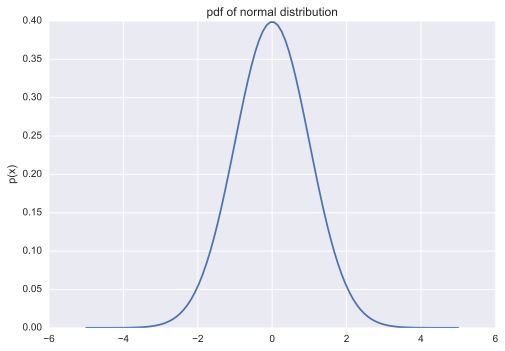

In [4]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

시뮬레이션을 통해 샘플을 얻으려면 rvs 메서드를 사용한다.

In [5]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

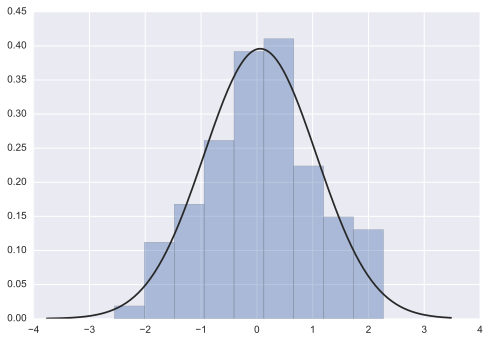

In [6]:
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

## Q-Q 플롯

정규 분포는 여러가지 연속 확률 분포 중에서도 가장 유용한 특성을 지니며 널리 사용되는 확률 분포이다. 따라서 어떤 확률 변수의 분포가 정규 분포인지 아닌지 확인하는 것은 정규 분포 검정(normality test)은 가장 중요한 통계적 분석 중의 하나이다. 그러나 구체적인 정규 분포 검정을 사용하기에 앞서 시작적으로 간단하게 정규 분포를 확인하는 Q-Q 플롯을 사용할 수 있다.

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플의 분포과 정규 분포의 분포 형태를 비교하는 시각적 도구이다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것이다. Q-Q 플롯을 그리는 구체적인 방법은 다음과 같다. 

1. 대상 샘플을 크기에 따라 정렬(sort)한다. 
2. 각 샘플의 분위수(quantile number)를 구한다.
3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값을 구한다.
4. 대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 유사한 형태의 플롯을 완성한다.
6. 비교를 위한 45도 직선을 그린다. 

SciPy 패키지의 stats 서브 패키지는 Q-Q 플롯을 계산하고 그리기 위한 `probplot` 명령을 제공한다. 

* http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

`probplot`은 기본적으로 인수로 보낸 데이터 샘플에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 `plot` 인수에 matplotlib.pylab 모듈 객체 혹은 `Axes` 클래스 객체를 넘겨주어야 한다.

정규 분포를 따르는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.

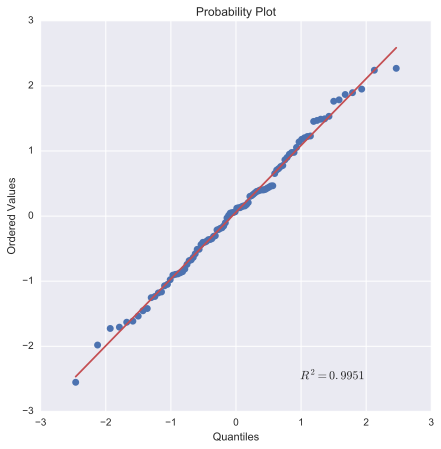

In [35]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

정규 분포를 따르지 않는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선이 아닌 휘어진 형태로 나타난다.

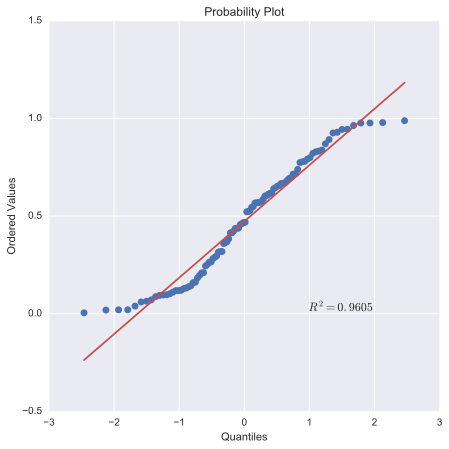

In [36]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

## 중심 극한 정리

실세계에서 발생하는 현상 중 많은 것들이 정규 분포로 모형화 가능하다. 그 이유 중의 하나는 다음과 같은 중심 극한 정리(Central Limit Theorem)이다. 중심 극한 정리는 어떤 분포를 따르는 확류 변수든 간에 해당 확률 변수가 복수인 경우 그 합은 정규 분포와 비슥한 분포를 이루는 현상을 말한다.

좀 더 수학적인 용어로 쓰면 다음과 같다.


$X_1, X_2, \ldots, X_n$가 기댓값이 $\mu$이고 분산이 $\sigma^2$으로 동일한 분포이며 서로 독립인 확률 변수들이라고 하자.

이 값들의 합

$$ S_n = X_1+\cdots+X_n $$ 

도 마찬가지로 확률 변수이다. 이 확률 변수 $S_n$의 분포는 $n$이 증가할 수록 다음과 같은 정규 분포에 수렴한다.

$$ \dfrac{S_n}{\sqrt{n}} \xrightarrow{d}\ N(\mu,\;\sigma^2) $$

시뮬레이션을 사용하여 중심 극한 정리가 성립하는지 살펴보도록 하자.

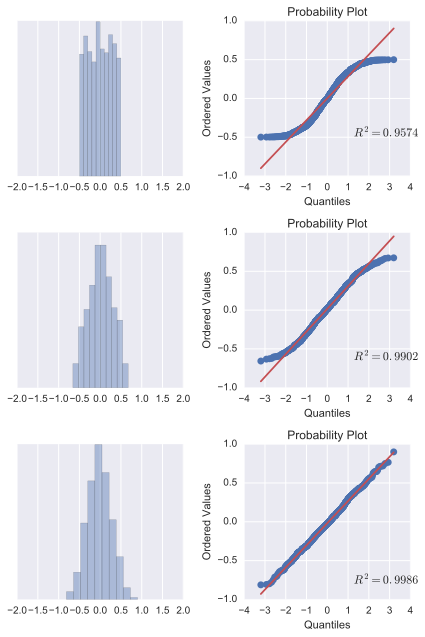

In [2]:
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(1000, N) - 0.5
    S = X.sum(axis=1)/np.sqrt(N)
    plt.subplot(3, 2, 2*i+1)
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    plt.subplot(3, 2, 2*i+2)
    sp.stats.probplot(S, plot=plt)
    
plt.tight_layout()
plt.show()